Basic data load from csv, into dataframe, and quick plotting.

based on http://nbviewer.jupyter.org/github/koldunovn/earthpy.org/blob/master/content/earthpy_pandas_basics.ipynb    


In [107]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel

In [108]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2017-03-30 17:24:53--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20150 (20K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii.1’

monthly.ao.index.b5 100%[===================>]  19.68K  --.-KB/s    in 0.008s  

2017-03-30 17:24:53 (2.34 MB/s) - ‘monthly.ao.index.b50.current.ascii.1’ saved [20150/20150]



parse into dataframe

In [109]:
df = pd.read_csv("monthly.ao.index.b50.current.ascii",
                header=None,
                names=["Y", "M", "Precip"],
                sep="\s+",
                parse_dates=[[0,1]])

In [110]:
df

,Y_M,Precip
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577
5,1950-06-01,0.538570
6,1950-07-01,-0.802480
7,1950-08-01,-0.851010
8,1950-09-01,0.357970
9,1950-10-01,-0.378900


dataframe tidy up

In [111]:
df.index = df.Y_M
del df['Y_M']

In [112]:
df

,Precip
Y_M,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


resample annually, averaging.

In [113]:
 
df.resample('A').mean()

,Precip
Y_M,
1950-12-31,-0.199501
1951-12-31,-0.364626
1952-12-31,-0.674990
1953-12-31,-0.016515
1954-12-31,-0.000770
1955-12-31,-0.361816
1956-12-31,-0.162823
1957-12-31,-0.342180
1958-12-31,-0.867629


plotting

In [114]:
import matplotlib.pyplot as plt

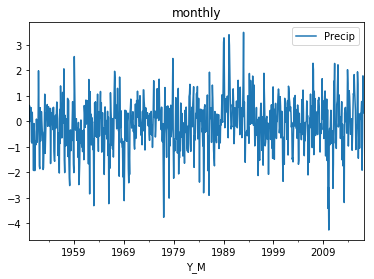

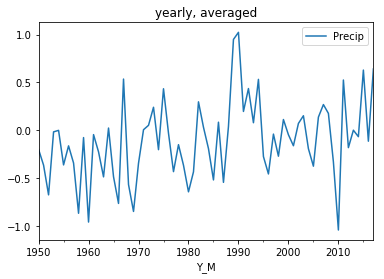

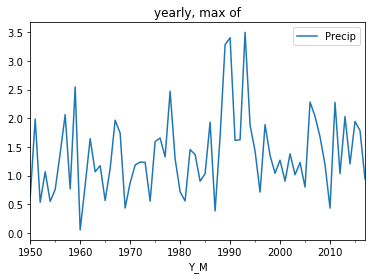

In [118]:
df.plot(title="monthly")
df.resample('A').mean().plot(title="yearly, averaged")
df.resample('A').max().plot(title="yearly, max of")
plt.show()

In [116]:
df.describe()

,Precip
count,806.000000
mean,-0.114829
std,1.007345
min,-4.265700
25%,-0.658900
50%,-0.042347
75%,0.475560
max,3.495300


By default the rolling mean gets right edge (reasonable as time series)

In [120]:
DataFrame.rolling(df, window=12).mean()

,Precip
Y_M,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN
1950-06-01,NaN
1950-07-01,NaN
1950-08-01,NaN
1950-09-01,NaN


Centering will post rolling mean result to the center

In [121]:
DataFrame.rolling(df, window=12,center=True).mean()

,Precip
Y_M,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN
1950-06-01,NaN
1950-07-01,-0.199501
1950-08-01,-0.201556
1950-09-01,-0.287117


Correlations

In [122]:
df.corr()

,Precip
Precip,1.0


In [123]:
df

,Precip
Y_M,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


### Mini functional custom time-grouping. Thanks JH Cho

In [124]:
# interpolation function
# wdw: index 
# returns dataframe of interpolated data
def int_f(wdw):
    e = np.random.normal(0.,1.,len(wdw))
    return pd.DataFrame(data=e, index=wdw.index)


In [127]:
ix = pd.date_range(start="1/1/2016", end="now", freq="D")
ts = pd.DataFrame(data=[np.nan]*len(ix), index=ix)
ts

,0
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
2016-01-09,NaN
2016-01-10,NaN


In [128]:
ts.groupby(pd.TimeGrouper(freq='M')).apply(int_f)

,0
2016-01-01,0.992763
2016-01-02,-0.572920
2016-01-03,0.235632
2016-01-04,-1.063557
2016-01-05,-1.884697
2016-01-06,0.654293
2016-01-07,-0.703719
2016-01-08,0.070270
2016-01-09,-0.942691
2016-01-10,2.226910


### Upsampling from yearly average to monthly

In [133]:
df_a = df.resample('A').mean()
df_a.describe()

,Precip
count,68.000000
mean,-0.105568
std,0.420534
min,-1.042535
25%,-0.364771
50%,-0.095164
75%,0.091631
max,1.024121


In [134]:
df

,Precip
Y_M,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [137]:
df.resample('D').pad()   # basic padding (all days inherit data from its month)

,Precip
Y_M,
1950-01-01,-0.06031
1950-01-02,-0.06031
1950-01-03,-0.06031
1950-01-04,-0.06031
1950-01-05,-0.06031
1950-01-06,-0.06031
1950-01-07,-0.06031
1950-01-08,-0.06031
1950-01-09,-0.06031


In [138]:
df.resample('D').bfill()   # backward filling (time-inverse of "pad", by months)

,Precip
Y_M,
1950-01-01,-0.06031
1950-01-02,0.62681
1950-01-03,0.62681
1950-01-04,0.62681
1950-01-05,0.62681
1950-01-06,0.62681
1950-01-07,0.62681
1950-01-08,0.62681
1950-01-09,0.62681


In [157]:
df_d = df.resample('D').asfreq()  # upsampling, but leaving NaN
df_d

,Precip
Y_M,
1950-01-01,-0.06031
1950-01-02,NaN
1950-01-03,NaN
1950-01-04,NaN
1950-01-05,NaN
1950-01-06,NaN
1950-01-07,NaN
1950-01-08,NaN
1950-01-09,NaN


Upsampling = Interpolating.  Pandas allow interpolation functions

In [158]:
df_d.Precip.count()

806

In [160]:
df_d.interpolate().count()

Precip    24504
dtype: int64

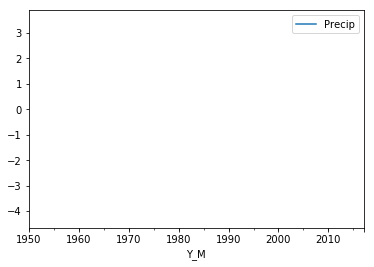

In [170]:
df_d.plot()
# df_d.interpolate().plot(title="interpolate, default")
plt.show()

In [168]:
df_d

,Precip
Y_M,
1950-01-01,-0.06031
1950-01-02,NaN
1950-01-03,NaN
1950-01-04,NaN
1950-01-05,NaN
1950-01-06,NaN
1950-01-07,NaN
1950-01-08,NaN
1950-01-09,NaN


### Upsampling from yearly to daily